In [1]:
!nvidia-smi

Sat Feb 24 17:20:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               8W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!unzip dogcat.zip -d /content

Archive:  dogcat.zip
   creating: /content/dogcat/
  inflating: /content/__MACOSX/._dogcat  
  inflating: /content/dogcat/README.roboflow.txt  
  inflating: /content/__MACOSX/dogcat/._README.roboflow.txt  
   creating: /content/dogcat/valid/
  inflating: /content/__MACOSX/dogcat/._valid  
  inflating: /content/dogcat/README.dataset.txt  
  inflating: /content/__MACOSX/dogcat/._README.dataset.txt  
  inflating: /content/dogcat/data.yaml  
  inflating: /content/__MACOSX/dogcat/._data.yaml  
   creating: /content/dogcat/train/
  inflating: /content/__MACOSX/dogcat/._train  
   creating: /content/dogcat/valid/images/
  inflating: /content/__MACOSX/dogcat/valid/._images  
   creating: /content/dogcat/valid/labels/
  inflating: /content/__MACOSX/dogcat/valid/._labels  
   creating: /content/dogcat/train/images/
  inflating: /content/__MACOSX/dogcat/train/._images  
   creating: /content/dogcat/train/labels/
  inflating: /content/__MACOSX/dogcat/train/._labels  
  inflating: /content/dogcat/v

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/dogcat/data.yaml epochs=25 imgsz=800

/content
100% 21.5M/21.5M [00:00<00:00, 204MB/s]
New https://pypi.org/project/ultralytics/8.1.18 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/dogcat/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line

/content


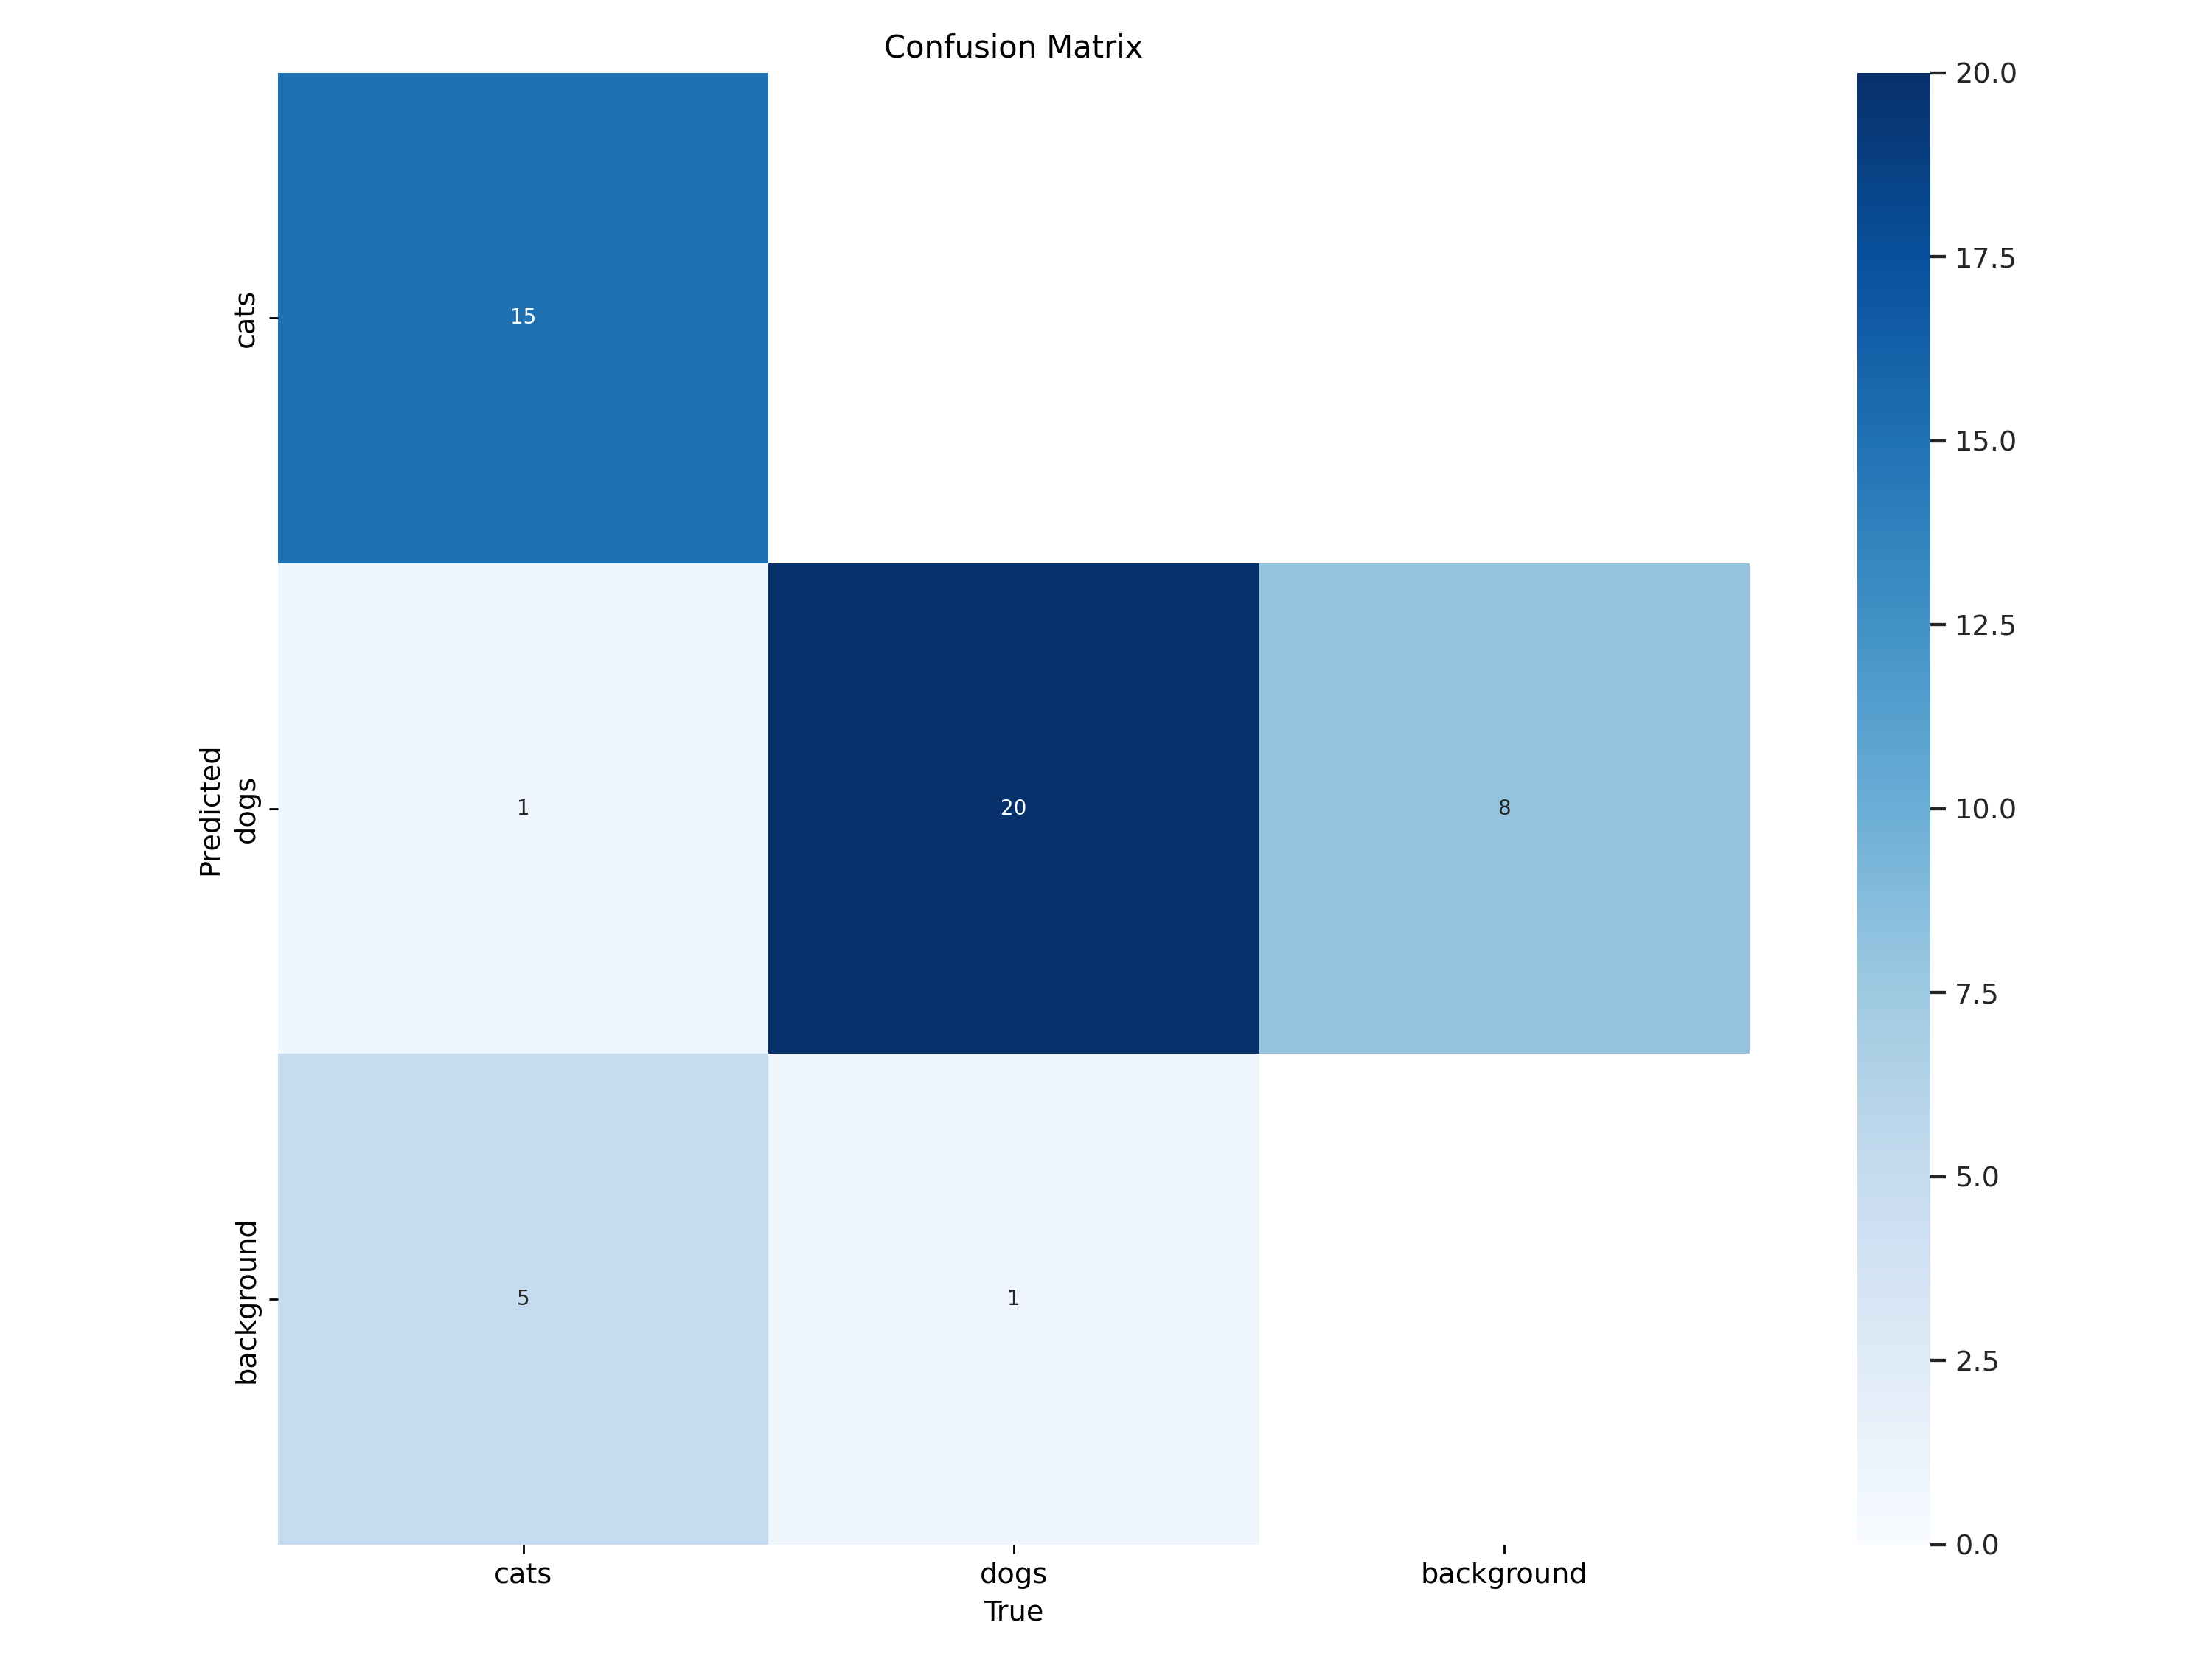

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


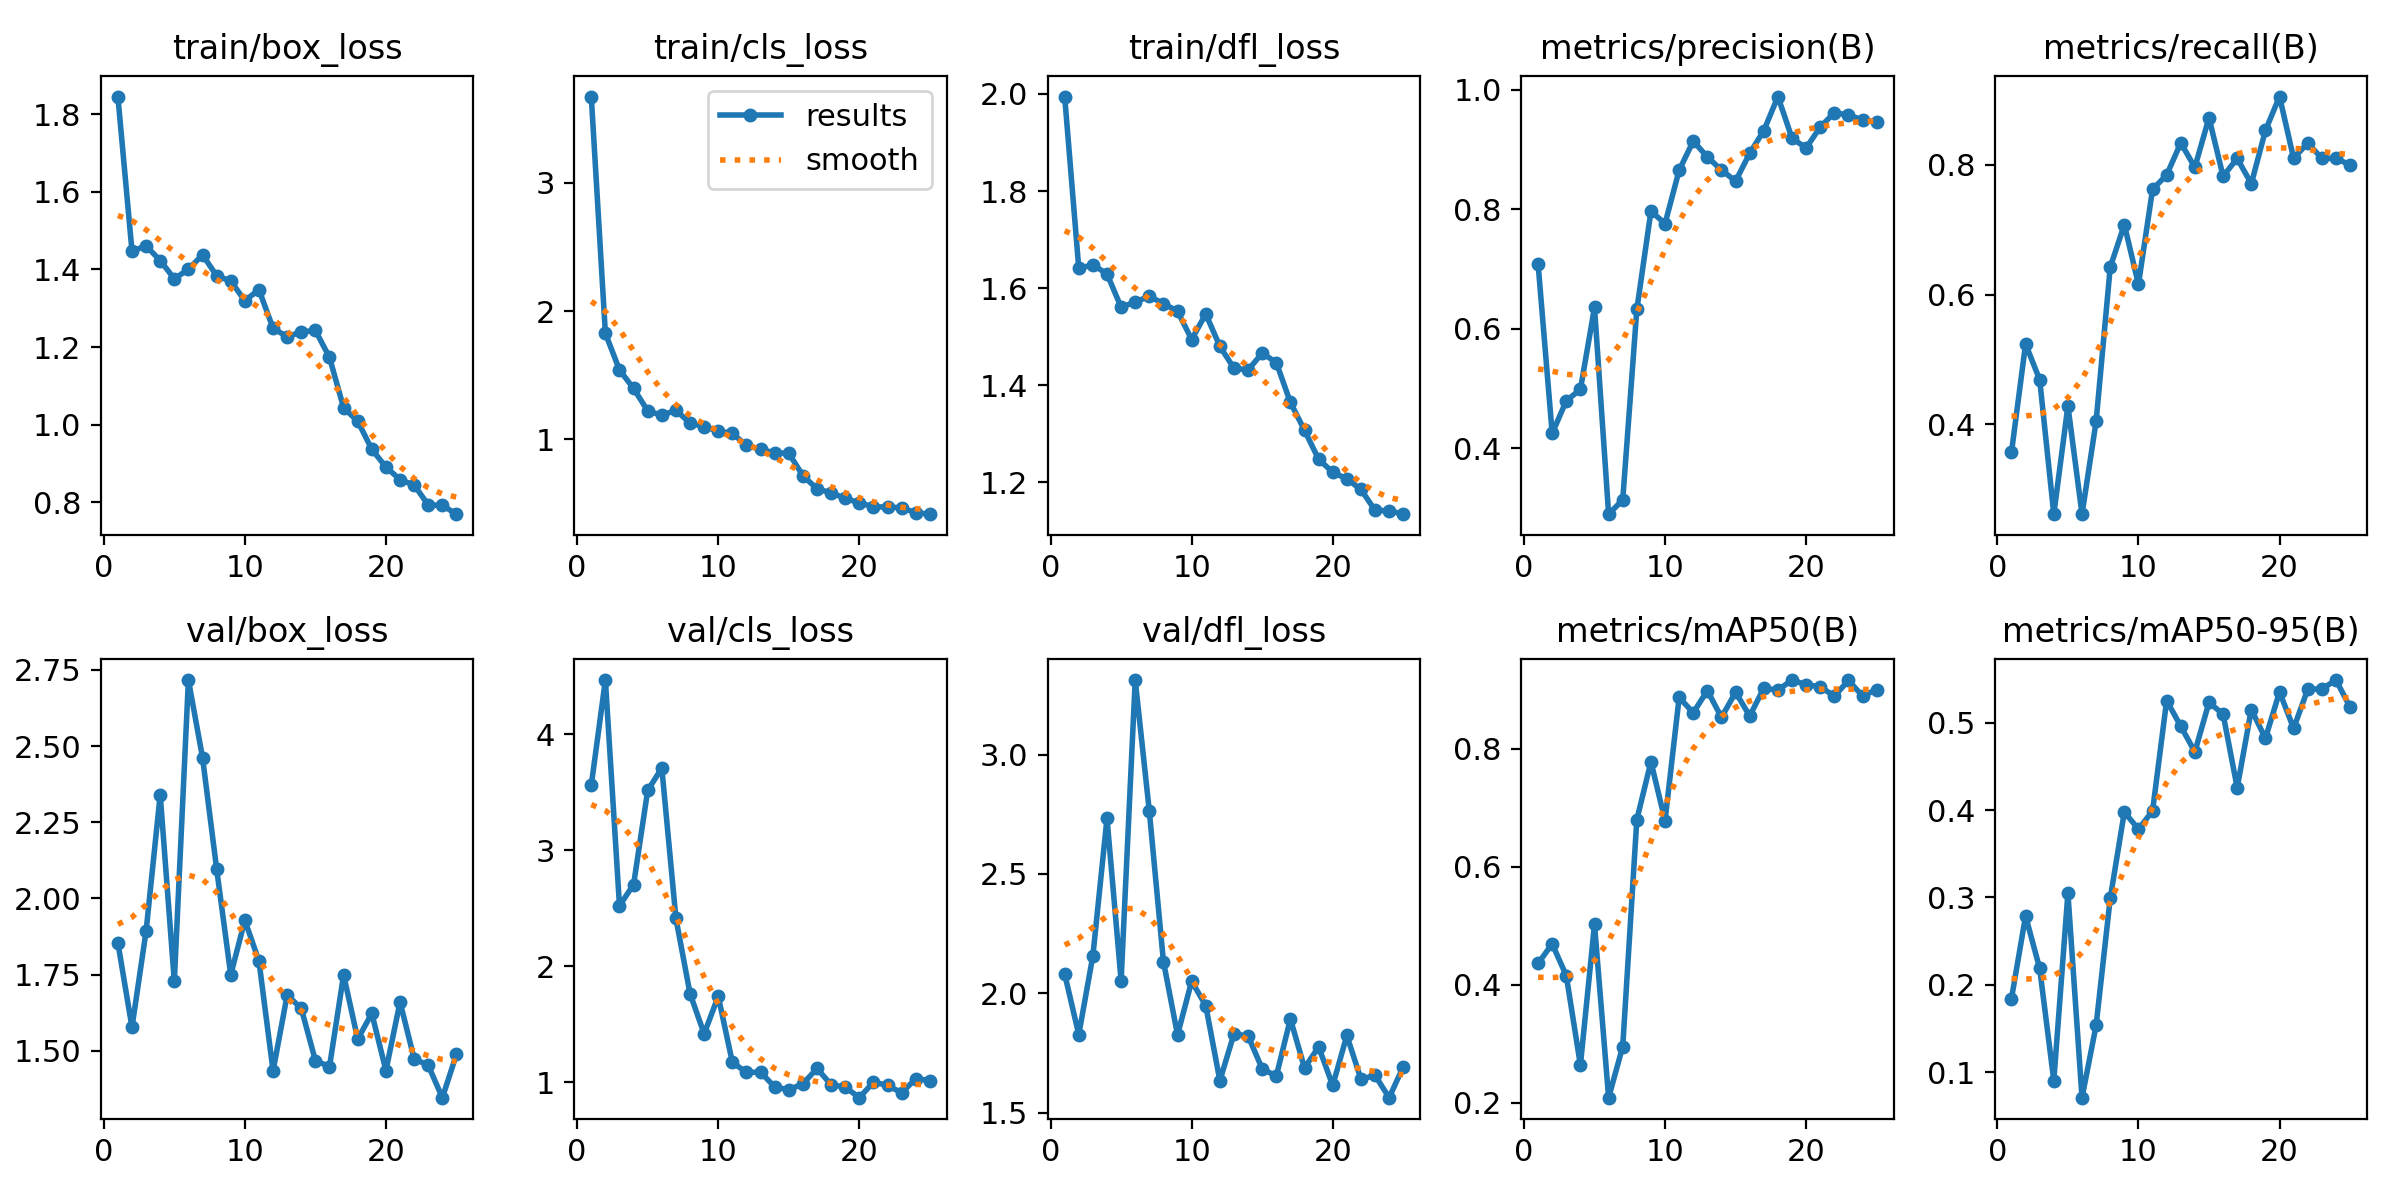

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


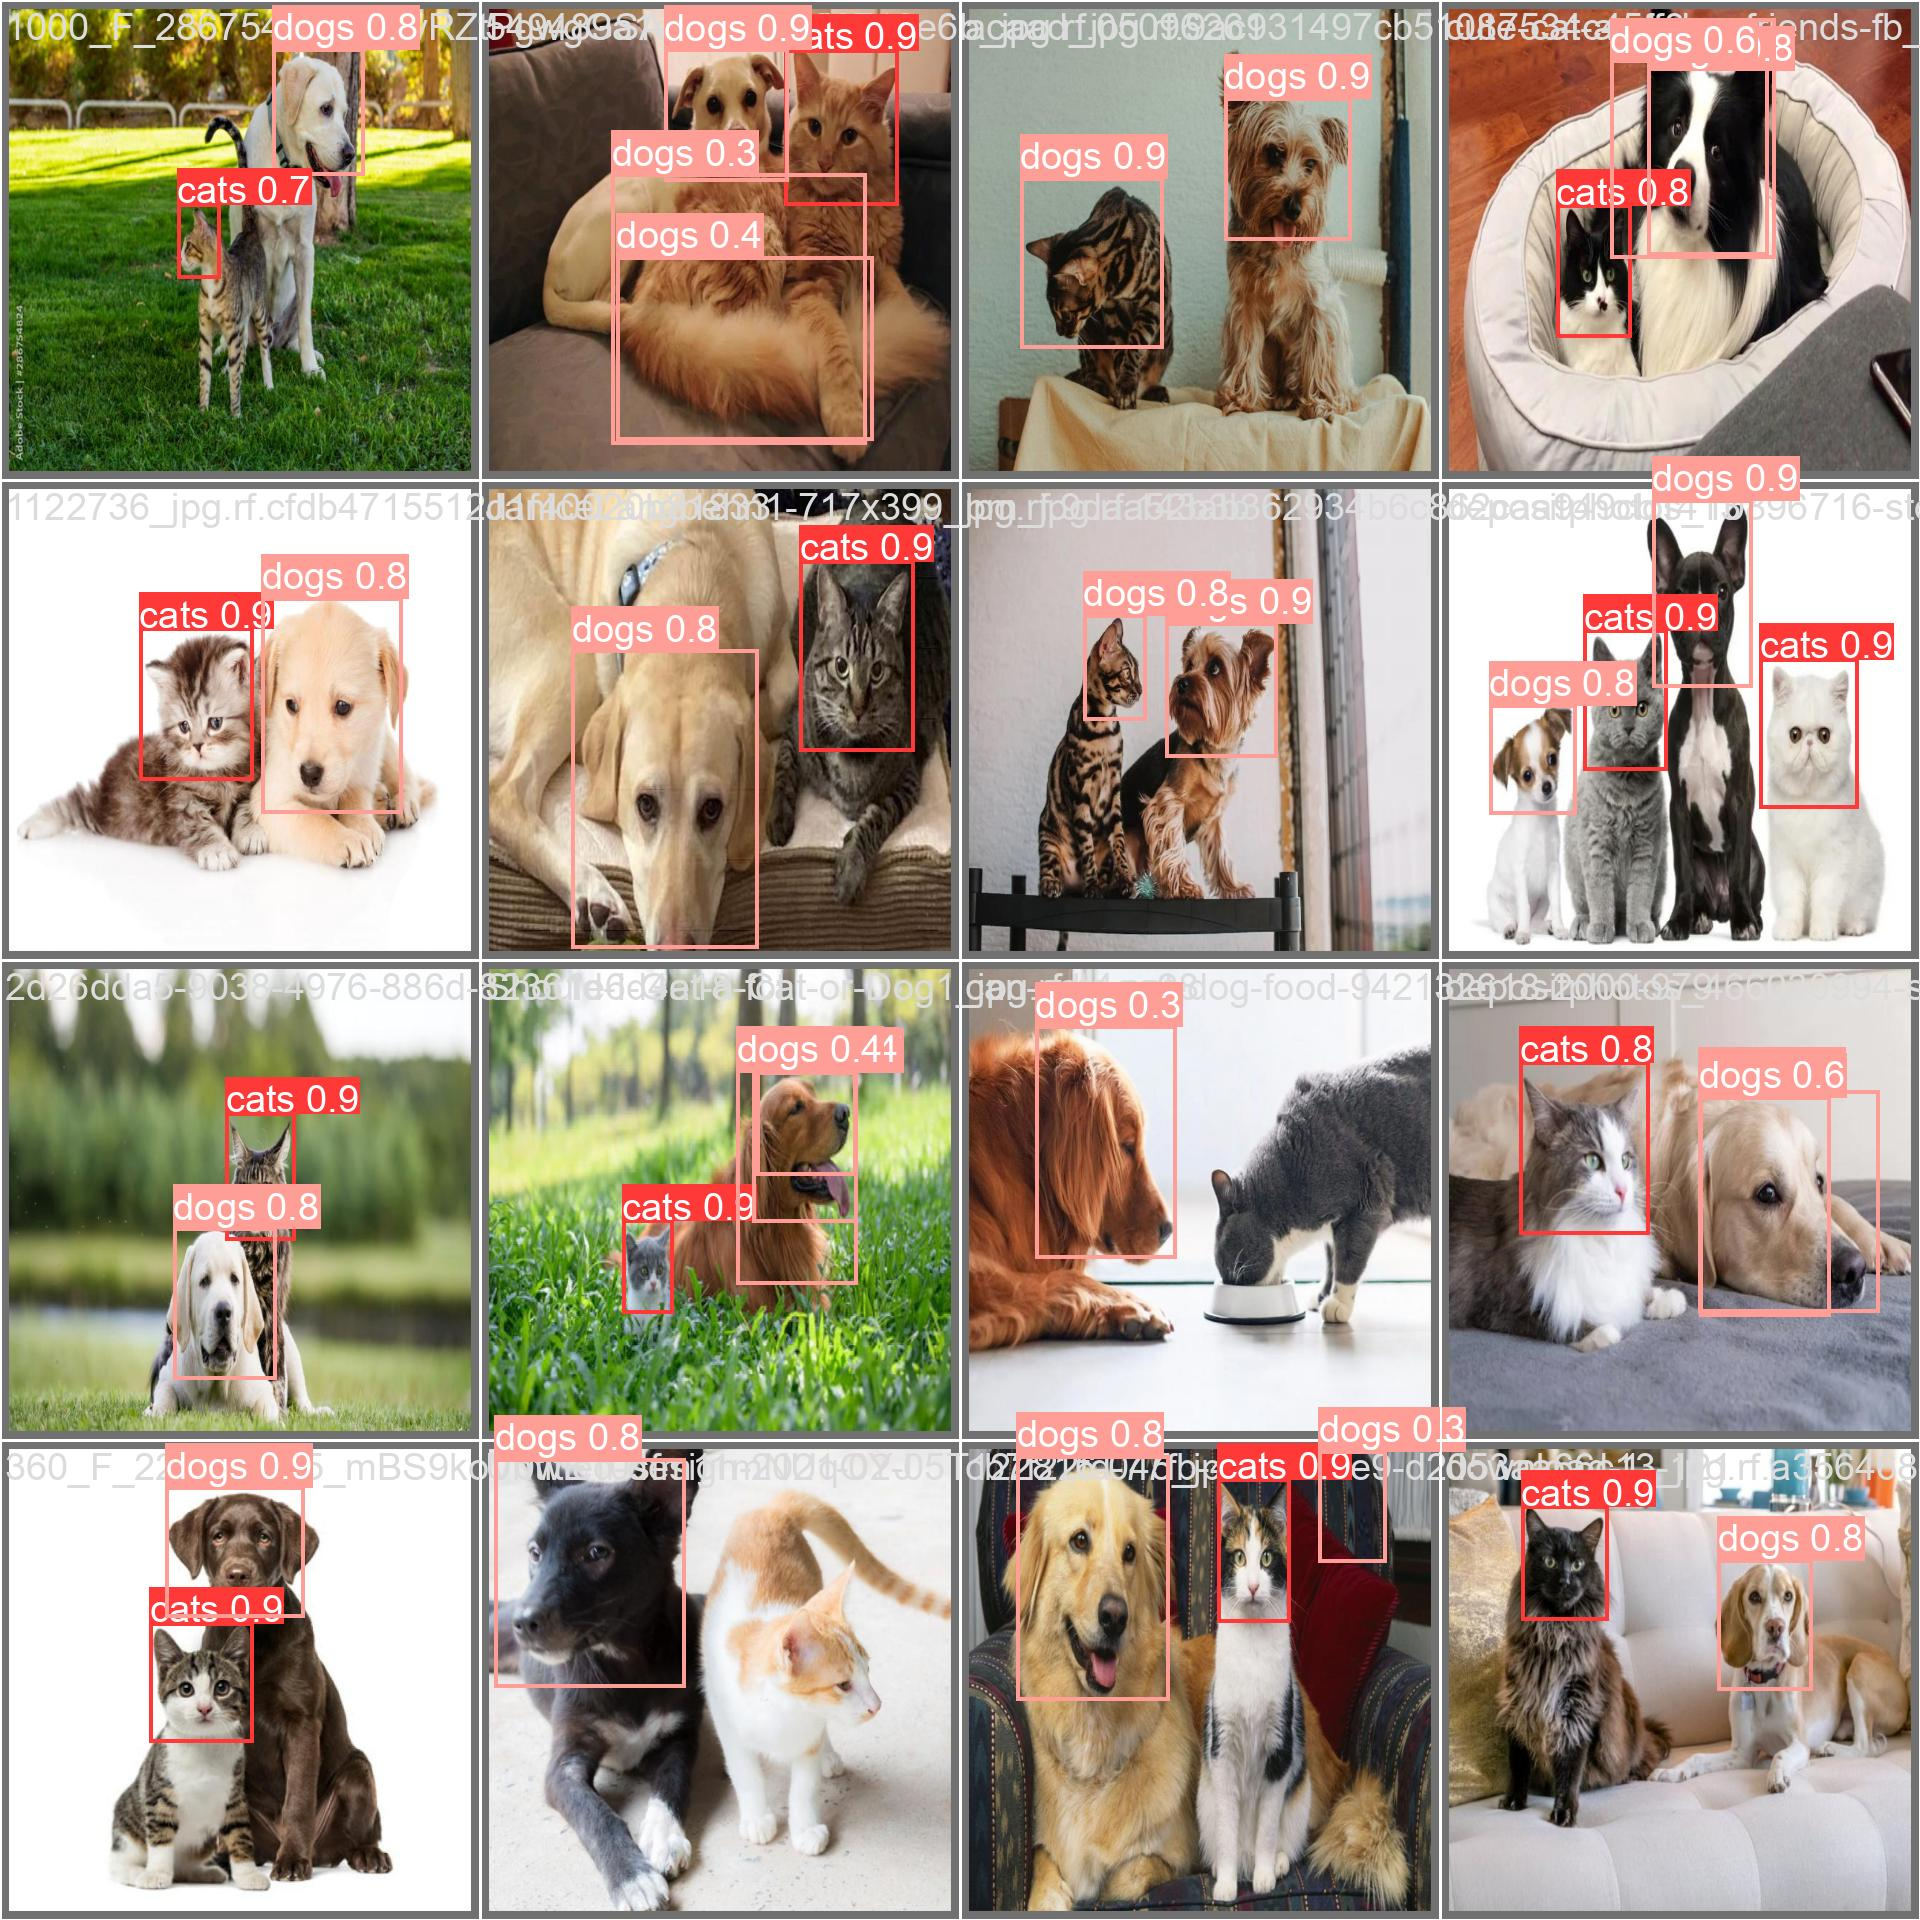

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [10]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/dogcat/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/dogcat/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.18it/s]
                   all         20         42       0.95       0.81       0.89      0.549
                  cats         20         21          1      0.714      0.869      0.606
                  dogs         20         21        0.9      0.905       0.91      0.491
Speed: 7.8ms preprocess, 23.6ms inference, 0.0ms loss, 30.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [11]:
import cv2
import os
import random

# Read the video from the specified path
vid = cv2.VideoCapture("/content/footage.webm")

try:
    # creating a folder named data
    if not os.path.exists('data'):
        os.makedirs('data')

# if not created then raise error
except OSError:
    print('Error: Creating directory of data')

# Get the total number of frames in the video
total_frames = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))

# Number of frames to extract
frames_to_extract = 10

# Randomly choose 10 frames
random_frames = random.sample(range(total_frames), frames_to_extract)

# Sort the frames to maintain order
random_frames.sort()

# frame
currentframe = 0
frame_count = 0

while (currentframe < total_frames):
    # reading from frame
    success, frame = vid.read()

    if success:
        # If the current frame index matches the next random frame index, save the frame
        if currentframe == random_frames[frame_count]:
            name = f'/content/dogcat/test/frame_{currentframe}.jpg'
            print('Creating...' + name)
            cv2.imwrite(name, frame)
            frame_count += 1

            # If all random frames have been extracted, break out of the loop
            if frame_count == frames_to_extract:
                break

        currentframe += 1
    else:
        break

# Release all space and windows once done
vid.release()
cv2.destroyAllWindows()


Creating.../content/dogcat/test/frame_58.jpg
Creating.../content/dogcat/test/frame_113.jpg
Creating.../content/dogcat/test/frame_120.jpg
Creating.../content/dogcat/test/frame_130.jpg
Creating.../content/dogcat/test/frame_152.jpg
Creating.../content/dogcat/test/frame_169.jpg
Creating.../content/dogcat/test/frame_182.jpg
Creating.../content/dogcat/test/frame_196.jpg
Creating.../content/dogcat/test/frame_199.jpg
Creating.../content/dogcat/test/frame_274.jpg


In [15]:
#customized model
%cd {HOME}
results = !yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/dogcat/test save=True
print(results)

/content
['Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)', 'Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs', '', 'image 1/10 /content/dogcat/test/frame_113.jpg: 480x800 1 dogs, 220.0ms', 'image 2/10 /content/dogcat/test/frame_120.jpg: 480x800 1 dogs, 15.7ms', 'image 3/10 /content/dogcat/test/frame_130.jpg: 480x800 (no detections), 15.6ms', 'image 4/10 /content/dogcat/test/frame_152.jpg: 480x800 (no detections), 15.6ms', 'image 5/10 /content/dogcat/test/frame_169.jpg: 480x800 1 dogs, 15.5ms', 'image 6/10 /content/dogcat/test/frame_182.jpg: 480x800 (no detections), 15.5ms', 'image 7/10 /content/dogcat/test/frame_196.jpg: 480x800 (no detections), 15.6ms', 'image 8/10 /content/dogcat/test/frame_199.jpg: 480x800 (no detections), 15.6ms', 'image 9/10 /content/dogcat/test/frame_274.jpg: 480x800 (no detections), 11.9ms', 'image 10/10 /content/dogcat/test/frame_58.jpg: 480x800 1 dogs, 11.9ms', 'Speed: 4.2ms preprocess, 

In [19]:
result = results[3:13];
print(result)

['image 1/10 /content/dogcat/test/frame_113.jpg: 480x800 1 dogs, 220.0ms', 'image 2/10 /content/dogcat/test/frame_120.jpg: 480x800 1 dogs, 15.7ms', 'image 3/10 /content/dogcat/test/frame_130.jpg: 480x800 (no detections), 15.6ms', 'image 4/10 /content/dogcat/test/frame_152.jpg: 480x800 (no detections), 15.6ms', 'image 5/10 /content/dogcat/test/frame_169.jpg: 480x800 1 dogs, 15.5ms', 'image 6/10 /content/dogcat/test/frame_182.jpg: 480x800 (no detections), 15.5ms', 'image 7/10 /content/dogcat/test/frame_196.jpg: 480x800 (no detections), 15.6ms', 'image 8/10 /content/dogcat/test/frame_199.jpg: 480x800 (no detections), 15.6ms', 'image 9/10 /content/dogcat/test/frame_274.jpg: 480x800 (no detections), 11.9ms', 'image 10/10 /content/dogcat/test/frame_58.jpg: 480x800 1 dogs, 11.9ms']


In [47]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

def send_email(subject, message):
    # Email configurations
    sender_email = ""
    receiver_email = ""
    password = ""

    # Create message container
    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = receiver_email
    msg['Subject'] = subject

    # Attach message
    msg.attach(MIMEText(message, 'plain'))

    # Connect to SMTP server and send email
    try:
        with smtplib.SMTP('smtp.gmail.com', 587) as server:
            server.starttls()
            server.login(sender_email, password)
            server.send_message(msg)
        print("Email sent successfully!")
    except Exception as e:
        print("Error sending email:", e)


# Function to parse YOLO output and check for dog detections
def check_for_dogs(output):
    output_str = '\n'.join(output)  # Convert SList to string
    for line in output_str.split('\n'):
        if 'dogs' in line:  # If dogs are detected
            op = 'dog'
            return op
        elif 'cats' in line:  # If cat are detected
            op = 'cat'
            return op
        else:
            return False

# Check if dogs are detected
if check_for_dogs(result) == 'dog':
    # Send email notification
    subject = "Dog Detected!"
    message = "A dog has been detected in the cctv in your region."
    send_email(subject, message)
elif check_for_dogs(result) == 'cat':
    # Send email notification
    subject = "Cat Detected!"
    message = "A cat has been detected in the cctv in your region."
    send_email(subject, message)
else:
    print("No stray animals detected")

Email sent successfully!


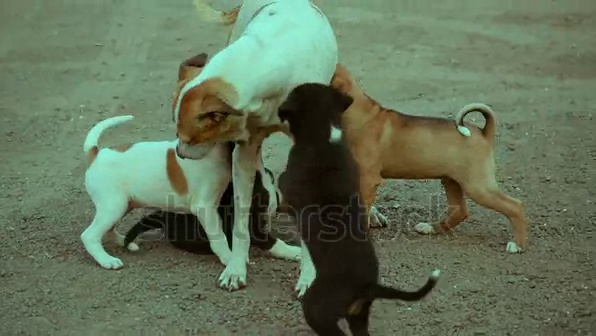

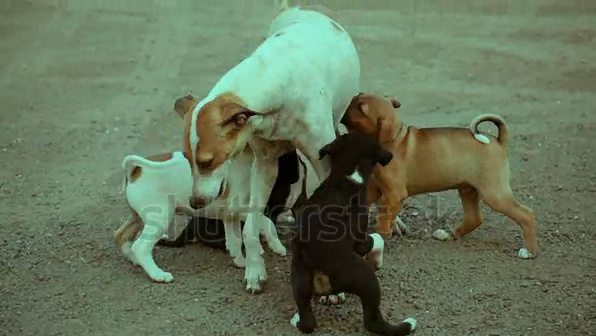

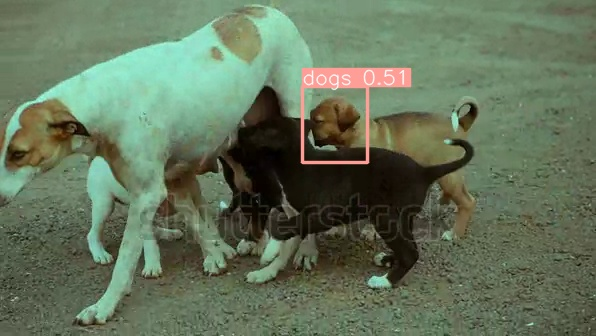

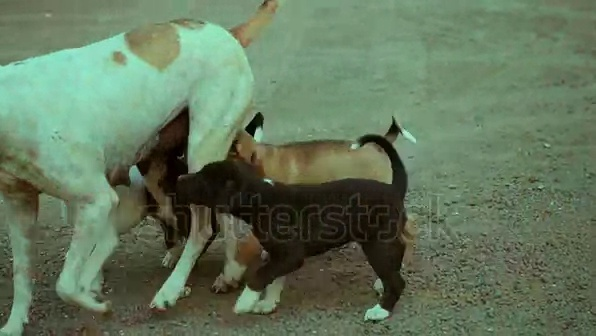

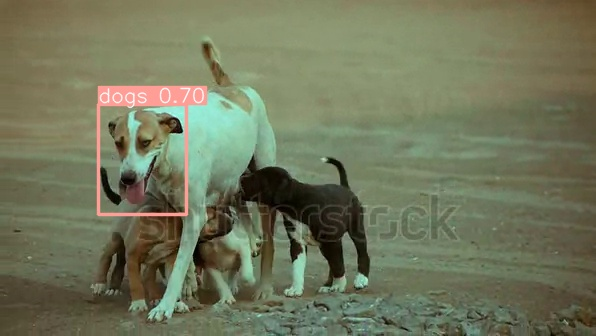

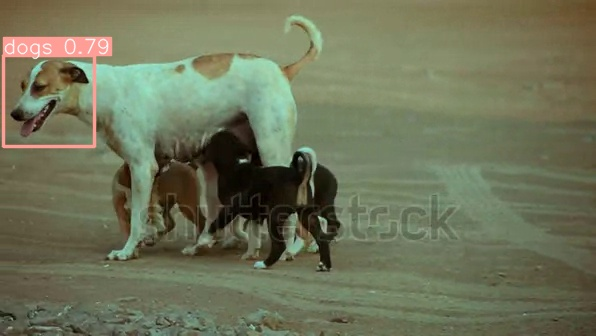

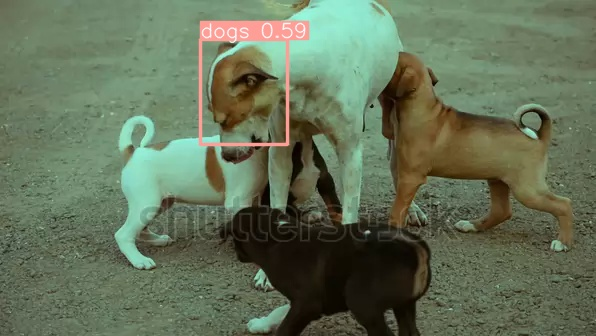

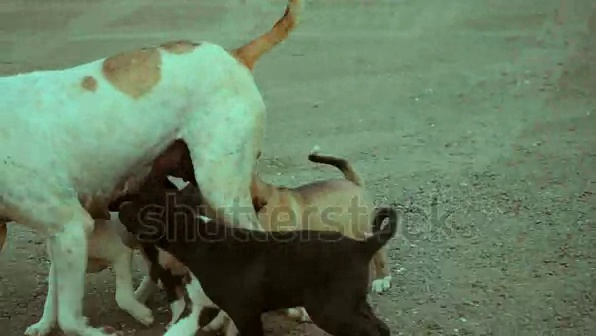

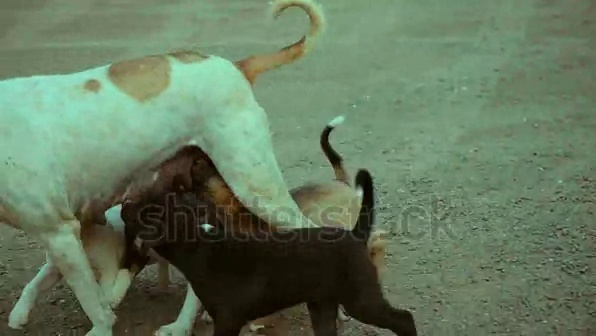

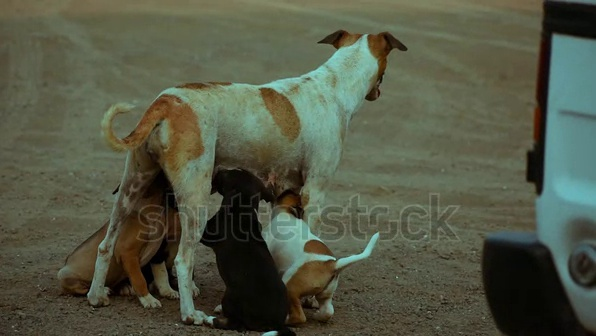

In [48]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*'):
      display(Image(filename=image_path, width=600))
      print("\n")